In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# what is in the hawaii sqlite file?
inspector = inspect(engine)
# Get a list of column names and types
inspector.get_table_names()

['measurement', 'station']

In [5]:
# what is in the 'measurement' table?
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
# Parse out just the month from the datetime object
dt.date.today().strftime("%m")

'08'

## D1: Determine the Summary Statistics for June

In [8]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
date_str = "06"
session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == date_str).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [9]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == date_str).all()
results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [10]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_tobs_df = pd.DataFrame(results, columns=['date','tobs'])
june_tobs_df

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [11]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_tobs_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
date_str2 = "12"
session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == date_str2).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [13]:
# 7. Convert the December temperatures to a list.
results2 = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == date_str2).all()
results2

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_tobs_df = pd.DataFrame(results2, columns=['date','tobs'])
dec_tobs_df

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_tobs_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


                  date       tobs
date                             
2010-01-01  2010-01-01  69.714286
2010-01-02  2010-01-02  67.000000
2010-01-03  2010-01-03  74.000000
2010-01-04  2010-01-04  75.000000
2010-01-05  2010-01-05  74.500000
...                ...        ...
2017-08-19  2017-08-19  78.750000
2017-08-20  2017-08-20  79.666667
2017-08-21  2017-08-21  79.500000
2017-08-22  2017-08-22  80.000000
2017-08-23  2017-08-23  80.250000

[2792 rows x 2 columns]


<AxesSubplot:xlabel='date'>

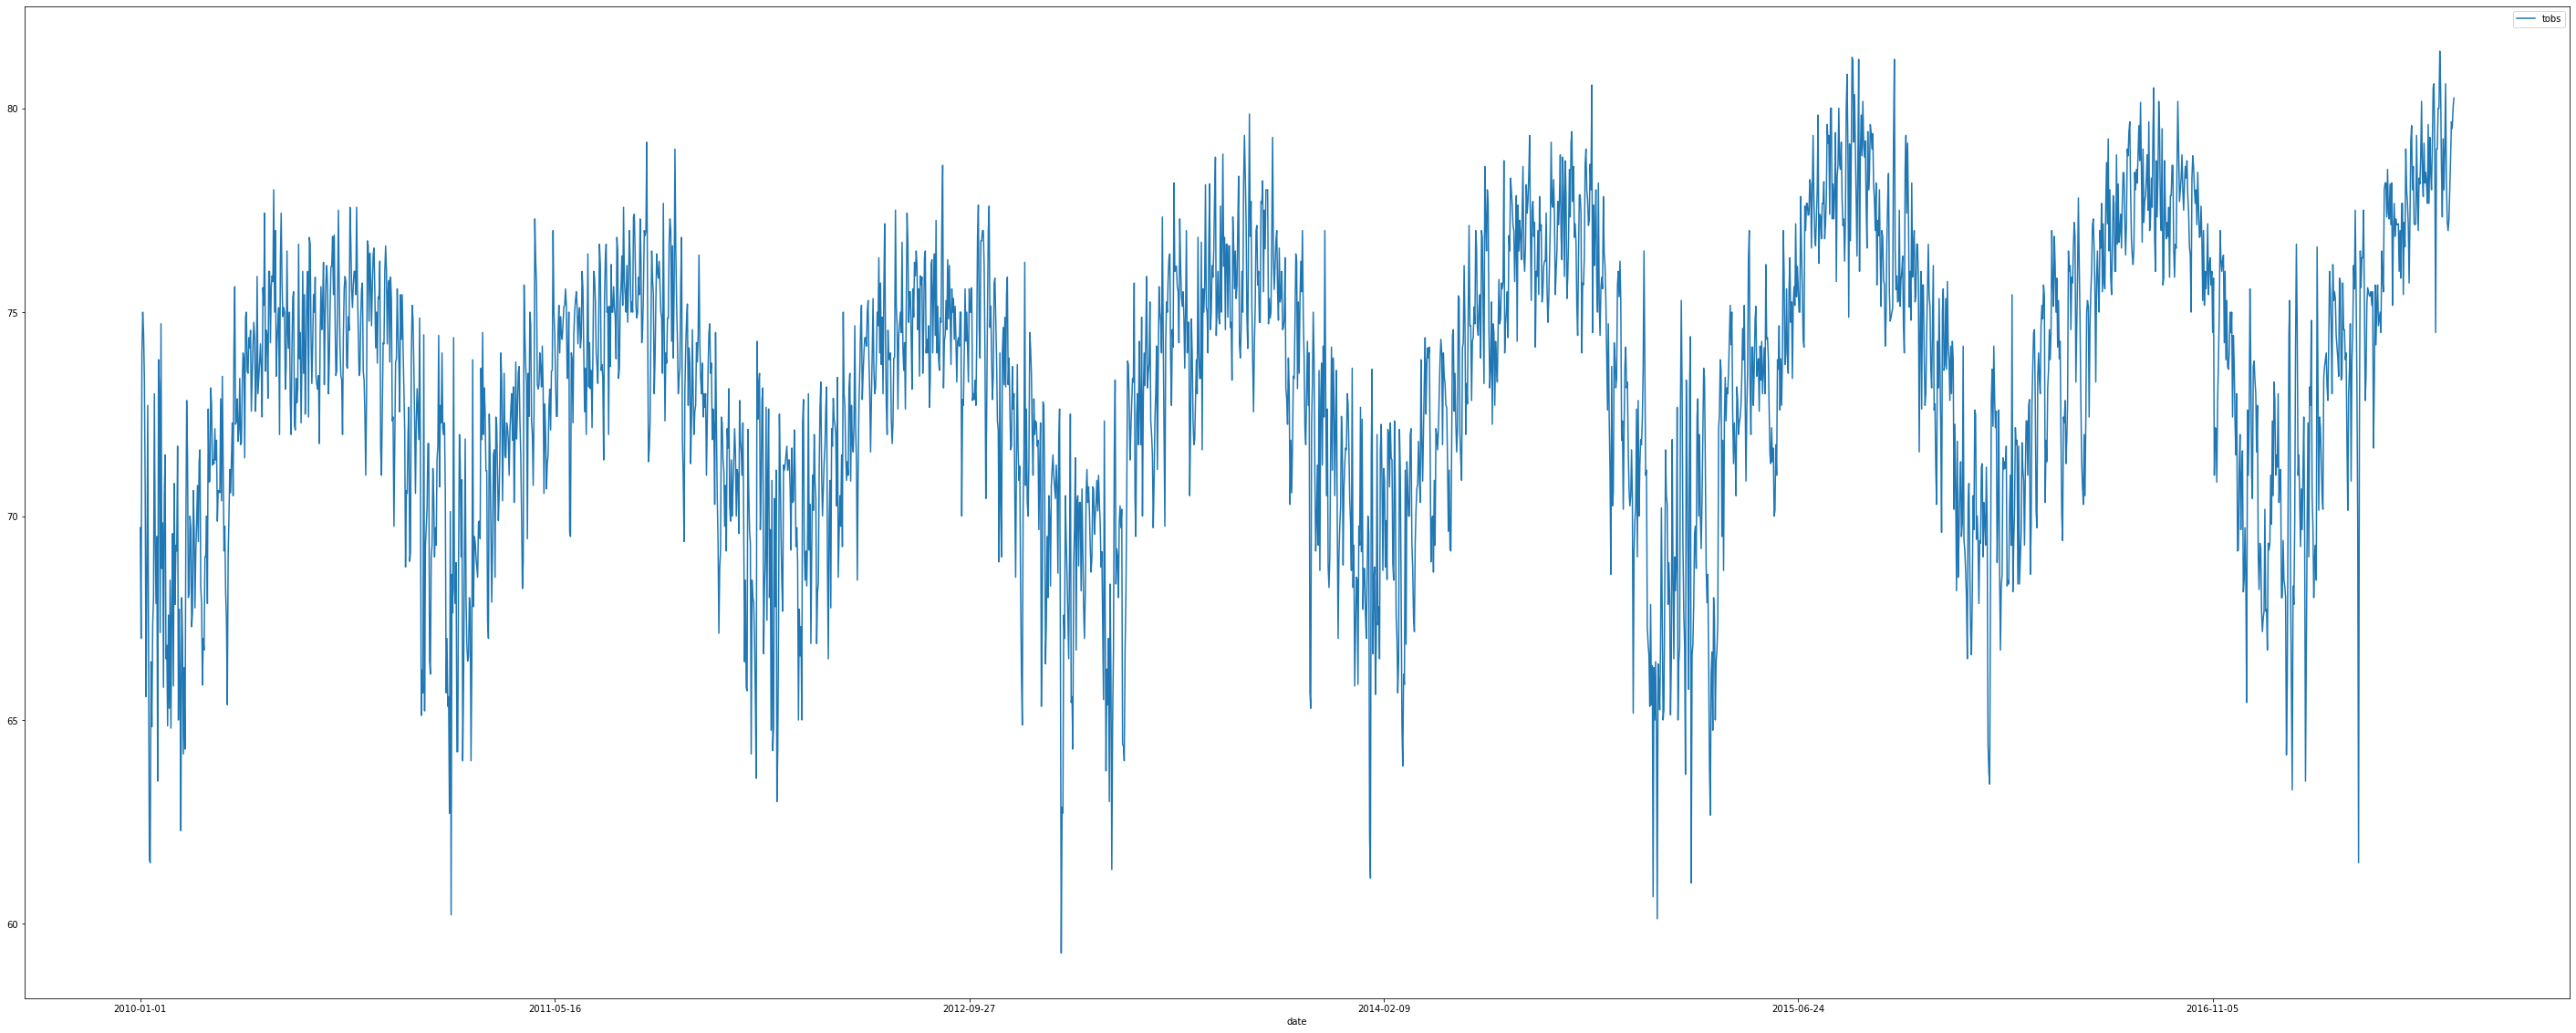

In [56]:
### Writeup for Challenge 
# Testing the suggested queries

# Suggestion 1: putting the temps in order and plotting trends
results3 = session.query(Measurement.date, func.avg(Measurement.tobs)).\
group_by(Measurement.date).order_by(Measurement.date).all()

df3 = pd.DataFrame(results3, columns=['date','tobs'])
# Sort the dataframe by date
df3.set_index(df3['date'], inplace=True)
df3 = df3.sort_index()
print(df3)

# Use Pandas Plotting with Matplotlib to plot the data
df3.plot(figsize=(50,20))


                  date  prcp
date                        
2010-01-01  2010-01-01  0.28
2010-01-02  2010-01-02  0.02
2010-01-03  2010-01-03  0.00
2010-01-04  2010-01-04  0.01
2010-01-05  2010-01-05  0.02
...                ...   ...
2017-08-19  2017-08-19  0.09
2017-08-20  2017-08-20  0.01
2017-08-21  2017-08-21  0.56
2017-08-22  2017-08-22  0.50
2017-08-23  2017-08-23  0.45

[2792 rows x 2 columns]


<AxesSubplot:xlabel='date'>

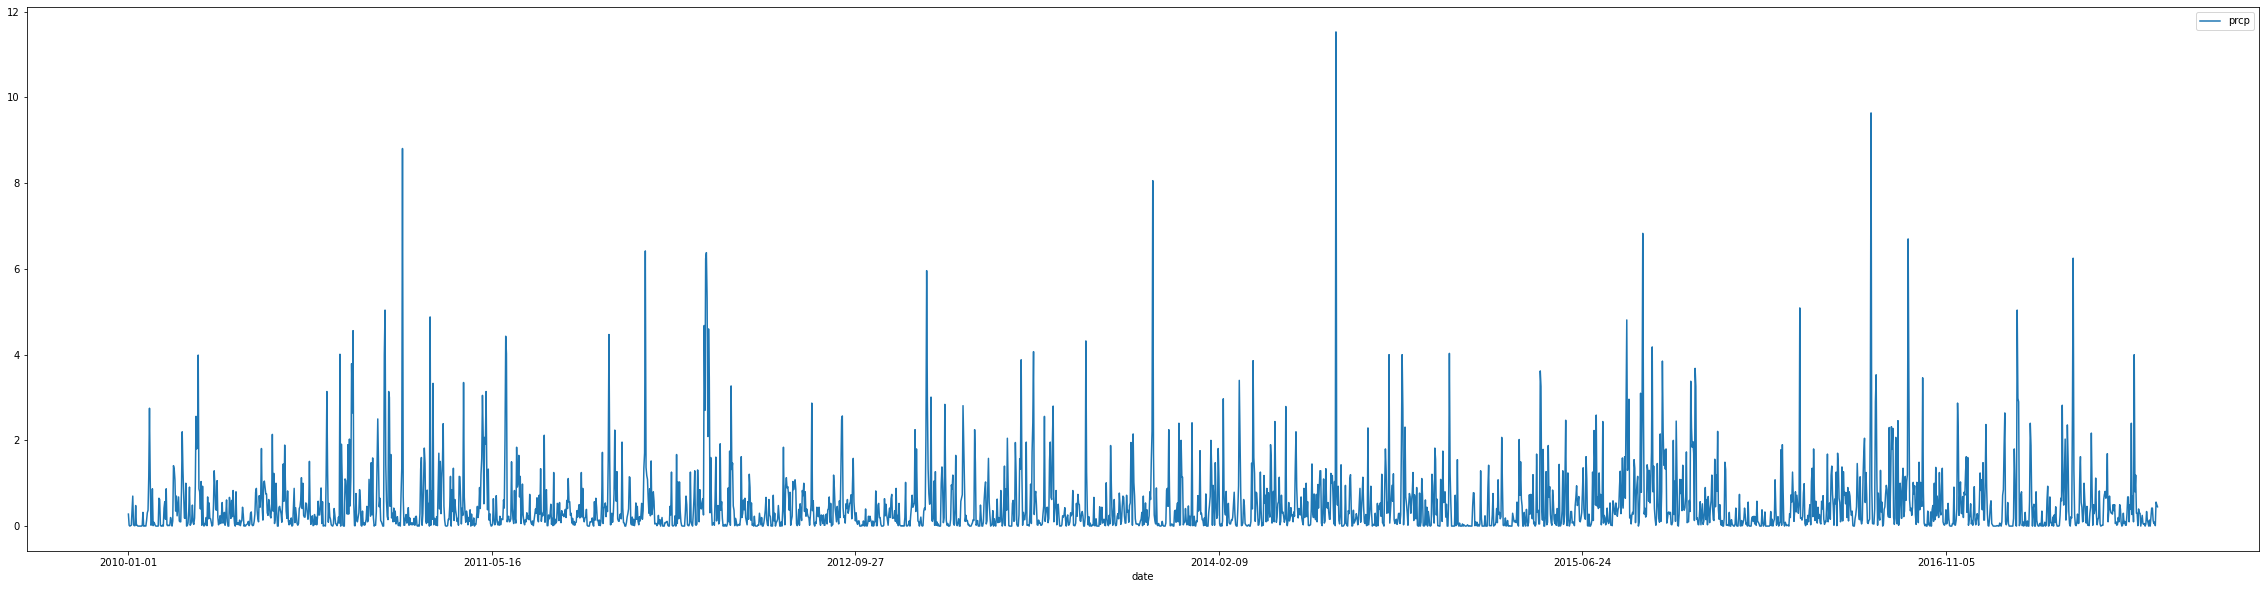

In [61]:
# Suggestion 2: Plotting precipitation trends
results4 = session.query(Measurement.date, func.max(Measurement.prcp)).\
group_by(Measurement.date).order_by(Measurement.date).all()


df4 = pd.DataFrame(results4, columns=['date','prcp'])
# Sort the dataframe by date
df4.set_index(df4['date'], inplace=True)
df4 = df4.sort_index()
print(df4)

# Use Pandas Plotting with Matplotlib to plot the data
df4.plot(figsize=(40,10))